# Alzheimer's image classification using DrillBitVi 

In [1]:
# !pip install drillvision
# !pip install git+https://github.com/Atashnezhad/DrillBitVision.git/@feature/bug_2
# !pip install git+https://github.com/Atashnezhad/DrillBitVision.git@feature/fix_bug
# ! pip install git+https://github.com/Atashnezhad/DrillBitVision.git

In [2]:
from pathlib import Path
from neural_network_model.process_data import Preprocessing
from neural_network_model.bit_vision import BitVision
from neural_network_model.transfer_learning import TransferModel
from neural_network_model.visual_insights import ImageNumeric

In [3]:
# !rm -r dataset
# !rm -r figures
# !rm -r models

# !ls -la

# !mkdir dataset
# !mkdir models
# !mkdir figures

# !cp -r /kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s\ Dataset/train/* ./dataset
# # !cp -r /kaggle/input/filtered-ad/filtered_dataset_ad/* ./dataset
# # !cp -r /kaggle/input/ad-lbp-filter-grey/filtered_dataset_ad_lbp/* ./dataset
# # !cp -r /kaggle/input/filtered-lbp-seismic/filtered_dataset_ad_lbp/* ./dataset
# # !cp -r /kaggle/input/segmented-ad-kmean-seismic/segmentation_dataset_ad_kmean/* ./dataset
# # !cp -r /kaggle/input/segmented-ad-kmean-3-cmap-viridis/segmentation_dataset_ad_kmean_3/* ./dataset
# # !cp -r /kaggle/input/edited-ad-cmap-sismic/edited_dataset_ad/* ./dataset


# !tree -L 2

In [4]:
dataset_address=Path("__file__").parent / "dataset"

2023-09-21 17:23:14,216 - INFO - Data was prepared


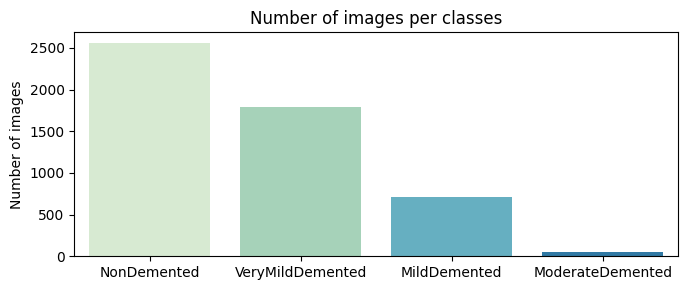

2023-09-21 17:23:14,393 - INFO - number of images belong to MildDemented: 717
2023-09-21 17:23:14,393 - INFO - number of images belong to ModerateDemented: 52
2023-09-21 17:23:14,394 - INFO - number of images belong to NonDemented: 2560
2023-09-21 17:23:14,394 - INFO - number of images belong to VeryMildDemented: 1792


In [5]:
transfer_model = TransferModel(
        dataset_address=dataset_address
    )

transfer_model.plot_classes_number(
    figsize=(7, 3),
    figure_folder_path=Path("__file__").parent / "test",
    palette="GnBu"
)

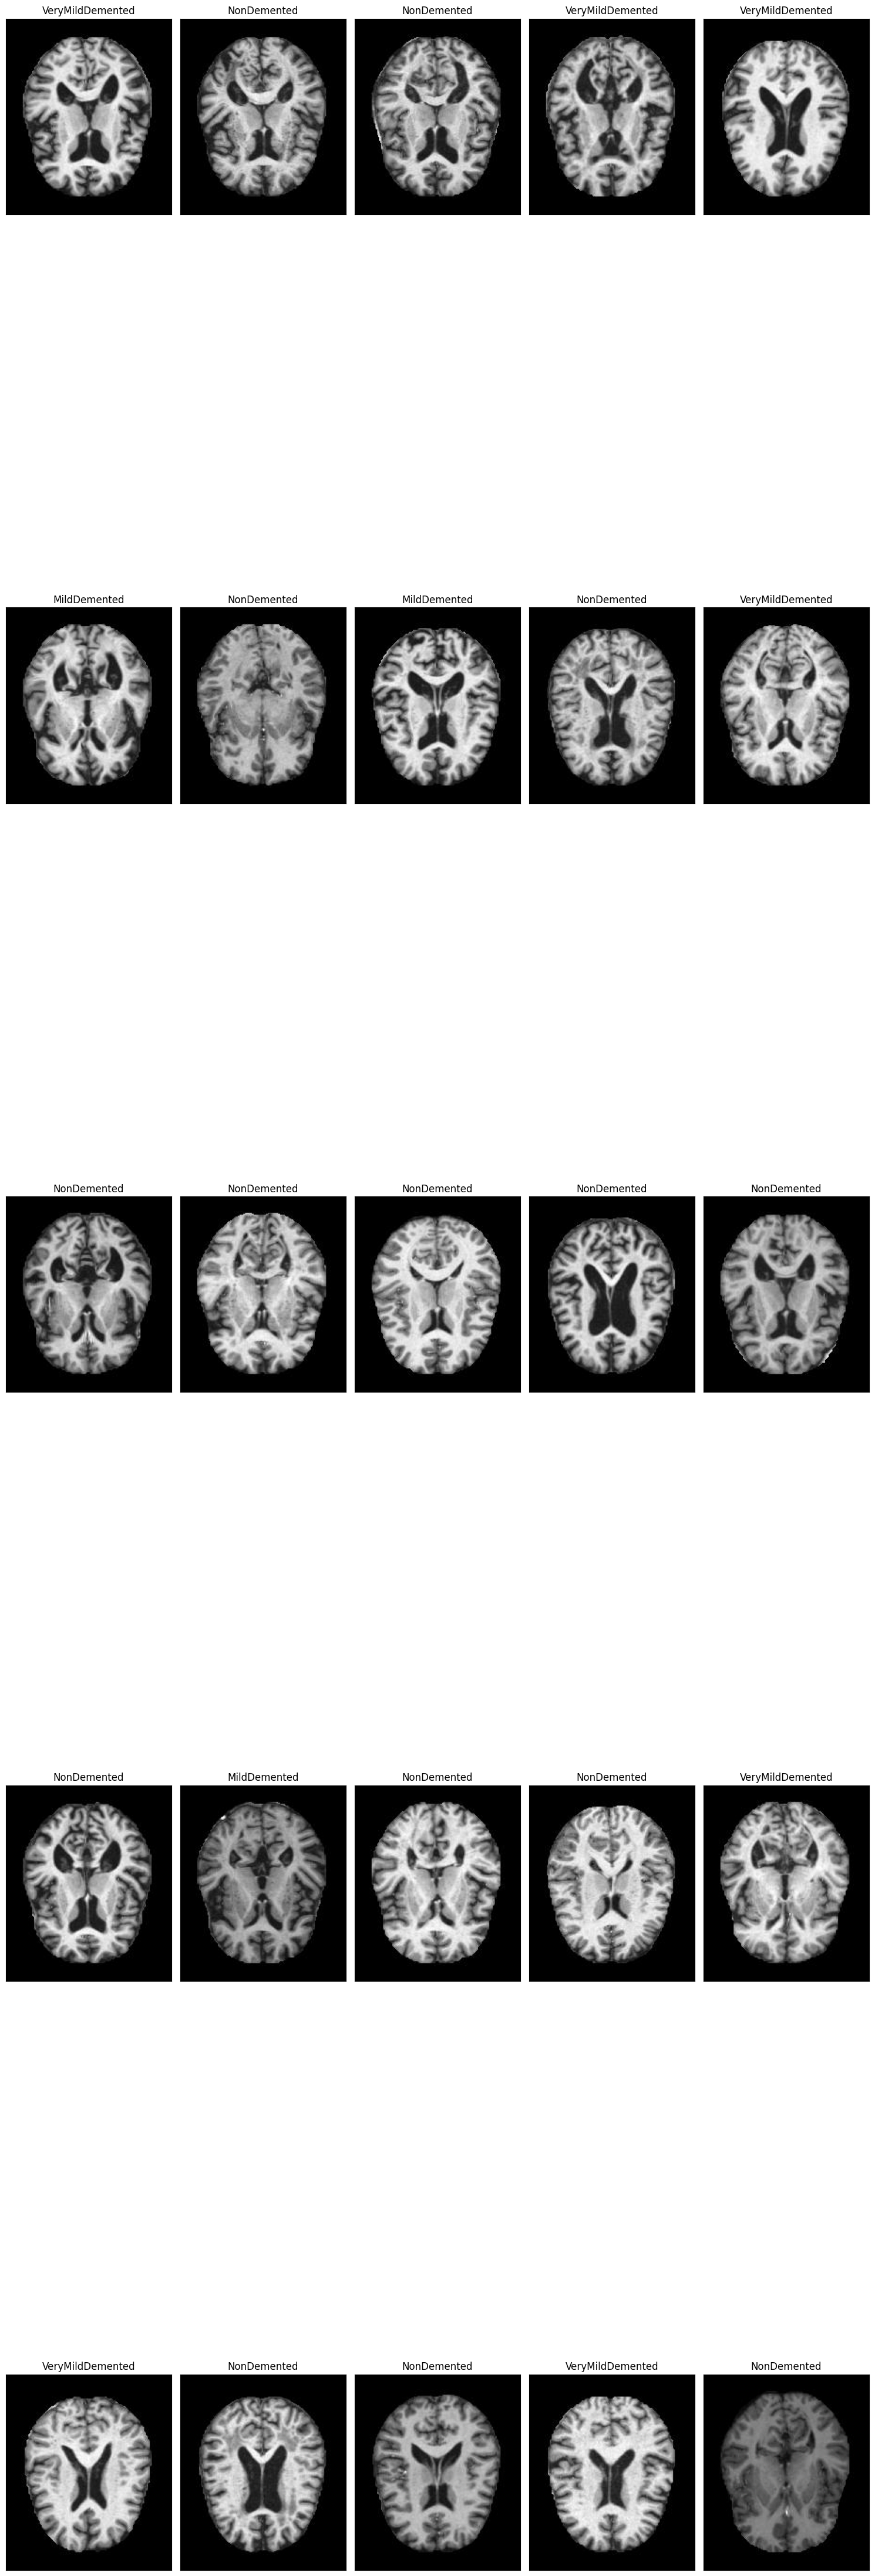

In [6]:
transfer_model.plot_data_images(
    figure_folder_path=Path("__file__").parent / "figures",
    num_cols=5,
    num_rows=5,
    figsize=(15,55)
)

In [7]:
# transfer_model.train_model(
#         epochs=100,
#         model_save_path=(Path("__file__").parent / "models").resolve(),
#         model_name="tf_model_1.h5"
#     )

In [8]:
transfer_model.plot_metrics_results()

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
transfer_model.results()

Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.


 ## Test Loss: 0.55058

## Accuracy on the test set: 82.04%

 ## Test Loss: 0.55058
## Accuracy on the test set: 82.04%


Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.
The first ... predictions: ['VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented']


classification_report
                   precision    recall  f1-score   support

    MildDemented       0.80      0.71      0.75        72
ModerateDemented       0.67      0.40      0.50         5
     NonDemented       0.89      0.83      0.86       256
VeryMildDemented       0.75      0.87      0.81       180

        accuracy                           0.82       513
       macro avg       0.78      0.70      0.73       513
    weighted avg       0.83      0.82      0.82       513



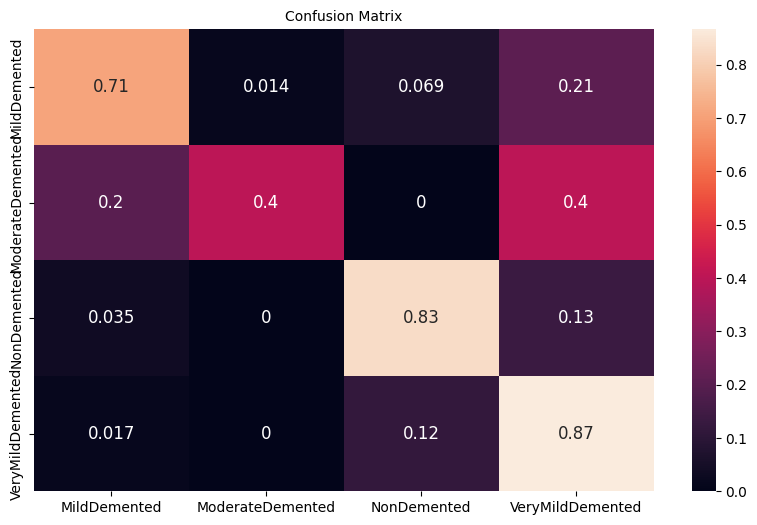

In [ ]:
report = transfer_model.predict_test(normalize="true")

In [ ]:
transfer_model.model_history.history.items()

dict_items([('loss', [0.9382217526435852, 0.8166695833206177, 0.7563717365264893, 0.6850961446762085, 0.6420440077781677, 0.5783870220184326, 0.5223797559738159, 0.4645017385482788, 0.4278710186481476, 0.3640466034412384, 0.34989774227142334, 0.31402531266212463, 0.2979201078414917, 0.21597345173358917, 0.21707278490066528, 0.19931291043758392, 0.13680441677570343, 0.13118286430835724, 0.09549859166145325, 0.09028652310371399, 0.07575439661741257, 0.13523434102535248, 0.07463163882493973, 0.03434332087635994]), ('categorical_accuracy', [0.7818849682807922, 0.7734234929084778, 0.7670774459838867, 0.7631349563598633, 0.7602956891059875, 0.7593722939491272, 0.7598972320556641, 0.7613125443458557, 0.7634732127189636, 0.7662638425827026, 0.7691811323165894, 0.7725422978401184, 0.7756640911102295, 0.779848039150238, 0.7840009331703186, 0.7880597114562988, 0.792384684085846, 0.7967292666435242, 0.8012489080429077, 0.8055529594421387, 0.8096585273742676, 0.8129225969314575, 0.8164744973182678,

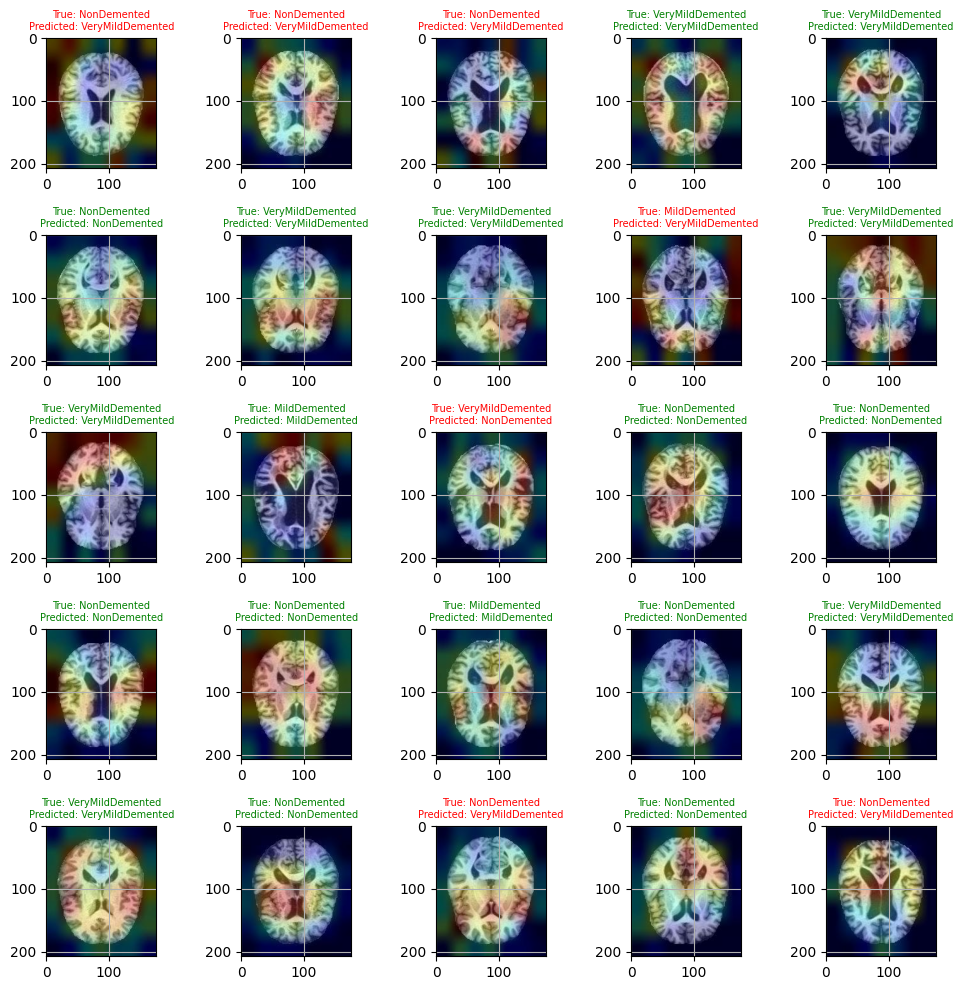

In [ ]:
transfer_model.grad_cam_viz(num_rows=5, num_cols=5, figsize=(10,10), title_lable_size=7)

In [9]:
# 모델을 불러오고 새로운 데이터를 입력으로 받아 예측 수행
from keras.models import load_model
import tensorflow as tf
import numpy as np
import cv2
# 훈련된 모델 불러오기
model = load_model(r'C:\pjbm\xray1\models\tf_model_1.h5')

model_summary = model.summary()
model_summary_str = str(model_summary)  # 모델 요약을 문자열로 변환
with open('model_summary.txt', 'w') as f:
    f.write(model_summary_str)  # 문자열을 파일에 쓰기



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [34]:
import pandas as pd
image = cv2.imread(r'C:\pjbm\xray1\dataset\VeryMildDemented\verymildDem335.jpg')

# 이미지 리사이징
resized_image = cv2.resize(image, (224, 224))

# 모델에 입력할 수 있는 형태로 변환 (예: 배치 차원 추가)
input_image = np.expand_dims(resized_image, axis=0)

# 모델로 예측 수행
predictions = model.predict(input_image)

# 예측 결과 출력
print(predictions)

max_probability = np.max(predictions)
predicted_class_index = np.argmax(predictions)

# 클래스 레이블 설정
class_labels = ["NonDemented", "VeryMildDemented", "MildDemented", "ModerateDemented"]

# 가장 높은 확률을 가진 클래스 출력
predicted_class_label = class_labels[predicted_class_index]

# 결과 출력
print(f"Predicted Class: {predicted_class_label}")
print(f"Probability: {max_probability:.4f}")


[[1.9155882e-04 5.0976764e-11 9.1244751e-01 8.7360926e-02]]
Predicted Class: MildDemented
Probability: 0.9124


In [15]:
import cv2
import numpy as np
from keras.models import load_model

# 이미지 파일 경로
image_path = r'C:\pjbm\xray1\dataset\ModerateDemented\moderateDem1.jpg'

# 이미지를 로드합니다.
image = cv2.imread(image_path)

# 이미지가 None이 아닌지 확인
if image is not None:
    # 이미지가 로드되었다면 크기를 조절하거나 전처리를 수행합니다.
    # 예를 들어, 이미지 리사이징 (224x224 크기로 가정) 및 정규화를 수행합니다.
    resized_image = cv2.resize(image, (224, 224))
    normalized_image = resized_image / 255.0  # 이미지를 0에서 1 사이 값으로 정규화

    # 모델을 로드합니다.
    model = load_model(r'C:\pjbm\xray1\models\tf_model_1.h5')

    # 이미지에 대한 예측을 수행합니다.
    predictions = model.predict(np.expand_dims(normalized_image, axis=0))

    # 예측 결과 출력
    print(predictions)
    image.grad_cam_viz(num_rows=5, num_cols=5, figsize=(10,10), title_lable_size=7)
else:
    print("이미지를 로드할 수 없습니다.")


[[0.77163005 0.00468424 0.13507712 0.08860862]]


AttributeError: 'numpy.ndarray' object has no attribute 'grad_cam_viz'

In [19]:
from PIL import Image

# 이미지 파일 경로
image_path = r'C:\pjbm\xray1\dataset\NonDemented\nonDem0.jpg'

# 이미지를 열기 (로드)
try:
    image = Image.open(image_path)
    # 이미지가 열렸으므로 처리하고 표시할 수 있습니다.
except IOError:
    print("이미지를 열 수 없습니다.")

# Supervise module

In [ ]:
# dataset_path = (Path("__file__").parent / "dataset").resolve()
# obj_super = SuperviseLearning(dataset_address=dataset_path)

# !mkdir filtered_dataset_path

# filtered_dataset_path = (Path("__file__").parent / "filtered_dataset_path").resolve()
# print(obj_super.image_df.head())
# obj_super.filter_images(
#     dataset_path=dataset_path,
#     filtered_dataset_path=filtered_dataset_path,
#     replace_existing=True
# )

# # transfer_model = TransferModel(
# #         dataset_address=Path("__file__").parent / "filtered_dataset"
# #     )

# transfer_model.plot_data_images(
#     figure_folder_path=Path("__file__").parent / "figures_filtered",
#     num_cols=5,
#     num_rows=20,
#     figsize=(15,55)
# )


# transfer_model.train_model(
#         epochs=100,
#         model_save_path=(Path("__file__").parent / "models").resolve(),
#         model_name="tf_model_1.h5"
#     )

# transfer_model.plot_metrics_results()

# transfer_model.predict_test(normalize="true")

# transfer_model.grad_cam_viz(num_rows=5, num_cols=5, figsize=(10,10), title_lable_size=8)